In [35]:
import pandas as pd
import numpy as np
from scipy.stats import skew# skewing the features
from sklearn.model_selection import train_test_split #
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt#Data visualisation libraries 
from sklearn.feature_extraction import DictVectorizer
import seaborn as sns
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
%matplotlib inline

In [26]:
df_train = pd.read_csv('https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/205873/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1553490692&Signature=moPb%2F6qsLGTndbRSikuChIvws4%2FRTzz1Vx8o6NQmHLDn34LH%2B3gRgHr27VR%2FN70ENsrzthM%2BXbyDzQMhAC4R0rAfRlGHZ%2F3oOBnlBlkLC1Y%2BirWNT7WALU94yxvmBpQZ3j7s9yWfEa26Xy135LyPSJmhwTlfZ%2Fi72OwpPJgvlO%2BYiXZAv9pNk%2F5L%2B3qx8ISQHUrZmD2g2HPM7%2BhIzhwkuuUrddxwuXa7qY8hJOxqfSfgVULrFTJsWnzDLXiaAuoKtJNWYwIHF%2F%2FAC39%2Fo2VHtqjxXL3h7kOIuzbi6z5TV4%2F2qGQxX%2FnuznieyomdWrmqR%2Fz9UZVMfitwzFU3pO4kxA%3D%3D')
df_test = pd.read_csv('https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/205873/test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1553490545&Signature=hclHtPT58nzV%2B1vbixB0jBY6z%2BtMYyccZ7Jx1q281pmcUv1eMVogPaV6QHk74q9fOKNfXUjqBB1glIPaLs7IXAJEPmY4vSpep0mbNepJiMuiIdCo71%2BzDHjmKUI78oC2lwRoSvKMo%2BHcvA3xxYYkdlhYGZ9QnA53Gzwcw53H8mepDTI6RF%2FIiJ%2BDUA3HS%2BF5uMeNJ%2FanSg3iEusMJ2TIRQf3fiHYBRJ1myX7HMZIx%2BkCAqIomOHyRDQau5Z7JLKxaao7aW%2FXm0O%2B1PyynskmwwQm%2F3eb4kTHotmYuSsD%2FNaS3lh0yDqmgoZ1Q8q2uD1hwgKkfcT6Nf%2FRi5iuY00AJA%3D%3D')
y_train = df_train.SalePrice.values
df_test2 = pd.read_csv('https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/205873/test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1553490545&Signature=hclHtPT58nzV%2B1vbixB0jBY6z%2BtMYyccZ7Jx1q281pmcUv1eMVogPaV6QHk74q9fOKNfXUjqBB1glIPaLs7IXAJEPmY4vSpep0mbNepJiMuiIdCo71%2BzDHjmKUI78oC2lwRoSvKMo%2BHcvA3xxYYkdlhYGZ9QnA53Gzwcw53H8mepDTI6RF%2FIiJ%2BDUA3HS%2BF5uMeNJ%2FanSg3iEusMJ2TIRQf3fiHYBRJ1myX7HMZIx%2BkCAqIomOHyRDQau5Z7JLKxaao7aW%2FXm0O%2B1PyynskmwwQm%2F3eb4kTHotmYuSsD%2FNaS3lh0yDqmgoZ1Q8q2uD1hwgKkfcT6Nf%2FRi5iuY00AJA%3D%3D')


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   
5   6          50       RL       85.000    14115   Pave   NaN      IR1   
6   7          20       RL       75.000    10084   Pave   NaN      Reg   
7   8          60       RL          nan    10382   Pave   NaN      IR1   
8   9          50       RM       51.000     6120   Pave   NaN      Reg   
9  10         190       RL       50.000     7420   Pave   NaN      Reg   

  LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
1         Lvl    AllPub

In [3]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(df_train.shape))
print("The test data size before dropping Id feature is : {} ".format(df_test.shape))

#Save the 'Id' column
train_ID = df_train['Id']
test_ID = df_test['Id']


#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(df_train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(df_test.shape))


The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


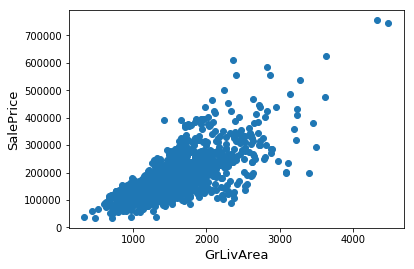

In [4]:
df_train =df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'],df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

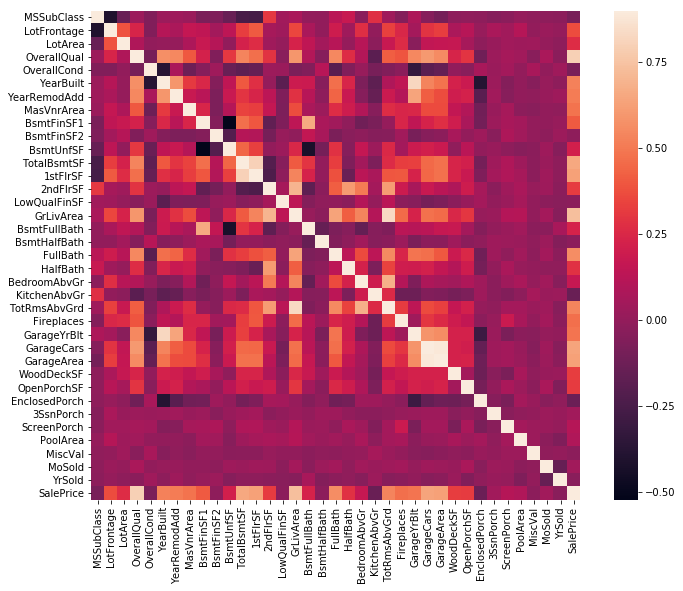

In [5]:
#correlation matrix
corrmat =df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [6]:
#all_data = pd.concat((df_train,df_test)),keys=['train', 'test'])
#all_data = pd.concat([df_train,df_test], keys=['train', 'test'])
all_data = pd.concat((df_train,df_test)).reset_index(drop=True)


print(df_train.describe())
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

       MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count    1458.000     1199.000   1458.000     1458.000     1458.000   
mean       56.893       69.797  10459.937        6.094        5.576   
std        42.329       23.203   9859.198        1.376        1.113   
min        20.000       21.000   1300.000        1.000        1.000   
25%        20.000       59.000   7544.500        5.000        5.000   
50%        50.000       69.000   9475.000        6.000        5.000   
75%        70.000       80.000  11600.000        7.000        6.000   
max       190.000      313.000 215245.000       10.000        9.000   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2    ...      \
count   1458.000      1458.000    1450.000    1458.000    1458.000    ...       
mean    1971.218      1984.834     102.754     438.827      46.613    ...       
std       30.194        20.642     179.442     432.969     161.421    ...       
min     1872.000      1950.000      

/Users/aniruddhadaware/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


/Users/aniruddhadaware/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


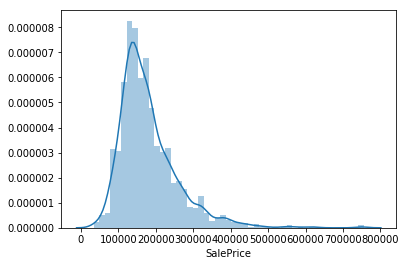

In [7]:
#sns.pairplot(df_train)
train_labels =df_train.pop('SalePrice')
ax = sns.distplot(train_labels)


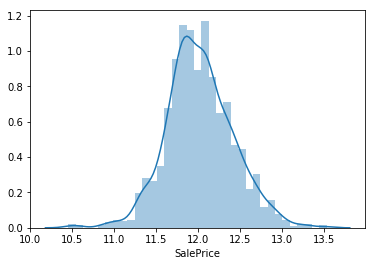

In [8]:
train_labels = np.log(train_labels)
ax = sns.distplot(train_labels)
#y_train=train_labels


In [9]:

all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
#MiscFeature : data description says NA means "no misc feature"
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
#Alley : data description says NA means "no alley access"
all_data["Alley"] = all_data["Alley"].fillna("None")
#Fence : data description says NA means "no fence"
all_data["Fence"] = all_data["Fence"].fillna("None")
#FireplaceQu : data description says NA means "no fireplace"
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
#LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
#GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
#GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
all_data = all_data.drop(['Utilities'], axis=1)
#Functional : data description says NA means typical
all_data["Functional"] = all_data["Functional"].fillna("Typ")
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
#SaleType : Fill in again with most frequent which is "WD"
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
#MSSubClass : Na most likely means No building class. We can replace missing values with None
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [10]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()


,Missing Ratio


In [11]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [12]:
#encoding method
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))


In [13]:
#one more feature
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
from scipy.stats import skew
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)



Skew in numerical features: 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


In [14]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])


There are 59 skewed numerical features to Box Cox transform


In [15]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)


(2917, 220)


In [16]:
ntrain = df_train.shape[0]
print(ntrain)
ntest = df_test.shape[0]
print(ntest)
train = all_data[:ntrain]
test = all_data[ntest:]
len(test)


1458
1459


1458

In [17]:
from sklearn import ensemble, tree, linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold,train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
x_train, x_test, Y_train, Y_test = train_test_split(train, train_labels, test_size=0.1, random_state=200)
#train_features = all_data.loc['train'].select_dtypes(include=[np.number]).values
#test_features = all_data.loc['test'].select_dtypes(include=[np.number]).values



In [18]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values,train_labels, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)




In [19]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(x_train, Y_train)
train_test(GBest, x_train, x_test, Y_train, Y_test)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)
R2: 0.9769316138641544
RMSE: 0.05902515649549626
Test
R2: 0.9365624220622265
RMSE: 0.09041653040401844


In [20]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



Gradient Boosting score: 0.1176 (0.0081)



In [34]:
GB_model = GBest.fit(train, train_labels)
## Getting our SalePrice estimation
Final_labels = (np.exp(GB_model.predict(test)))
## Saving to CSV

columns = ['SalePrice']
sub= pd.DataFrame(Final_labels,columns=columns)

sub['Id'] = df_test2['Id']
print(len(Final_labels))
print(len(test_ID))
print(test_ID.head(10))
# sub['SalePrice'] = Final_labels
print(len(sub['SalePrice']))
#print(len(Final_labels))
sub['SalePrice'] = sub['SalePrice']
sub = sub[['Id','SalePrice']]

sub.to_csv('submission.csv')
sub
#pd.DataFrame({'Id': df_test.id, 'SalePrice': Final_labels}).to_csv('2017-02-28.csv', index =False)    

1458
1459
0    1461
1    1462
2    1463
3    1464
4    1465
5    1466
6    1467
7    1468
8    1469
9    1470
Name: Id, dtype: int64
1458


,Id,SalePrice
0,1461,164257.791
1,1462,193804.534
2,1463,196974.351
3,1464,184825.049
4,1465,173259.870
5,1466,175886.260
6,1467,161879.734
7,1468,181847.361
8,1469,128354.243
9,1470,195893.183
